In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Load data
data = pd.read_csv("./House_Price_India.csv")

# Data cleaning
data = data.drop(["Date"], axis=1)
data["number of bedrooms"] = data["number of bedrooms"].astype(int)
data["waterfront present"] = data["waterfront present"].astype(int)

# Feature Engineering: Age of the house
data["house_age"] = data["Built Year"].max() - data["Built Year"]

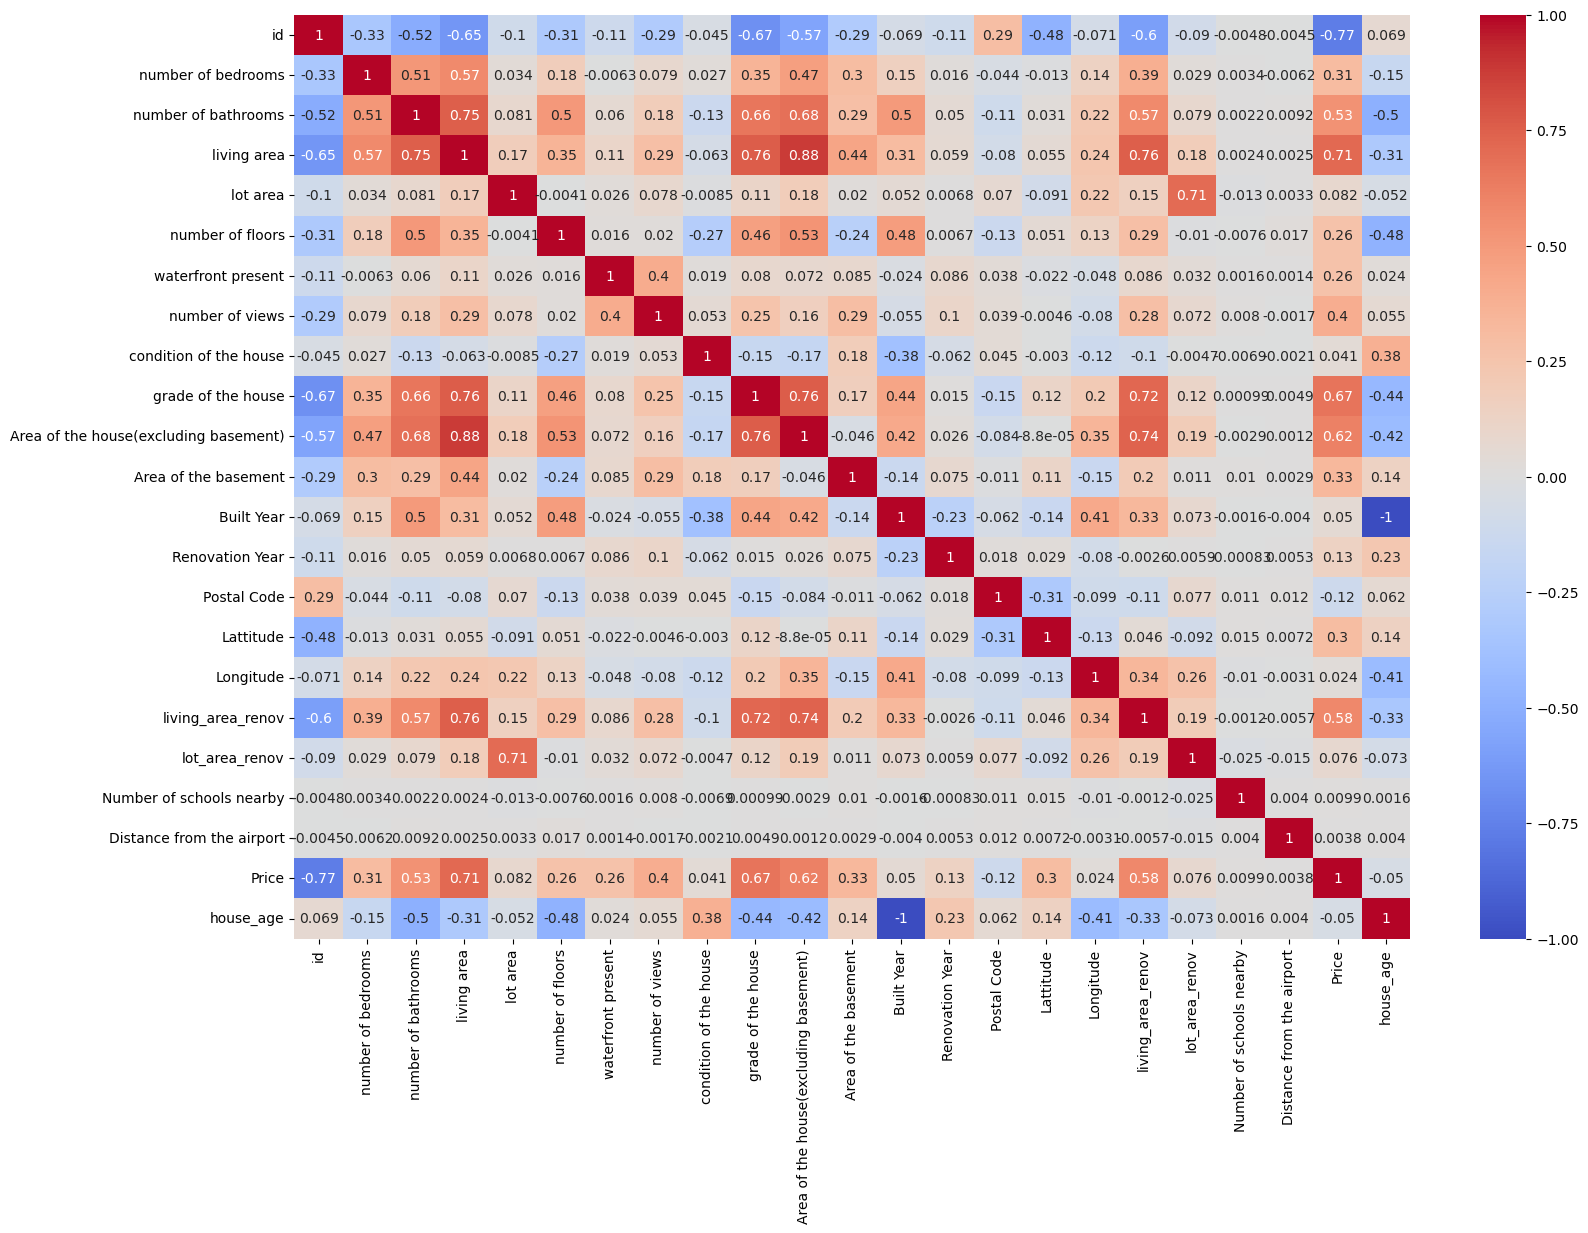

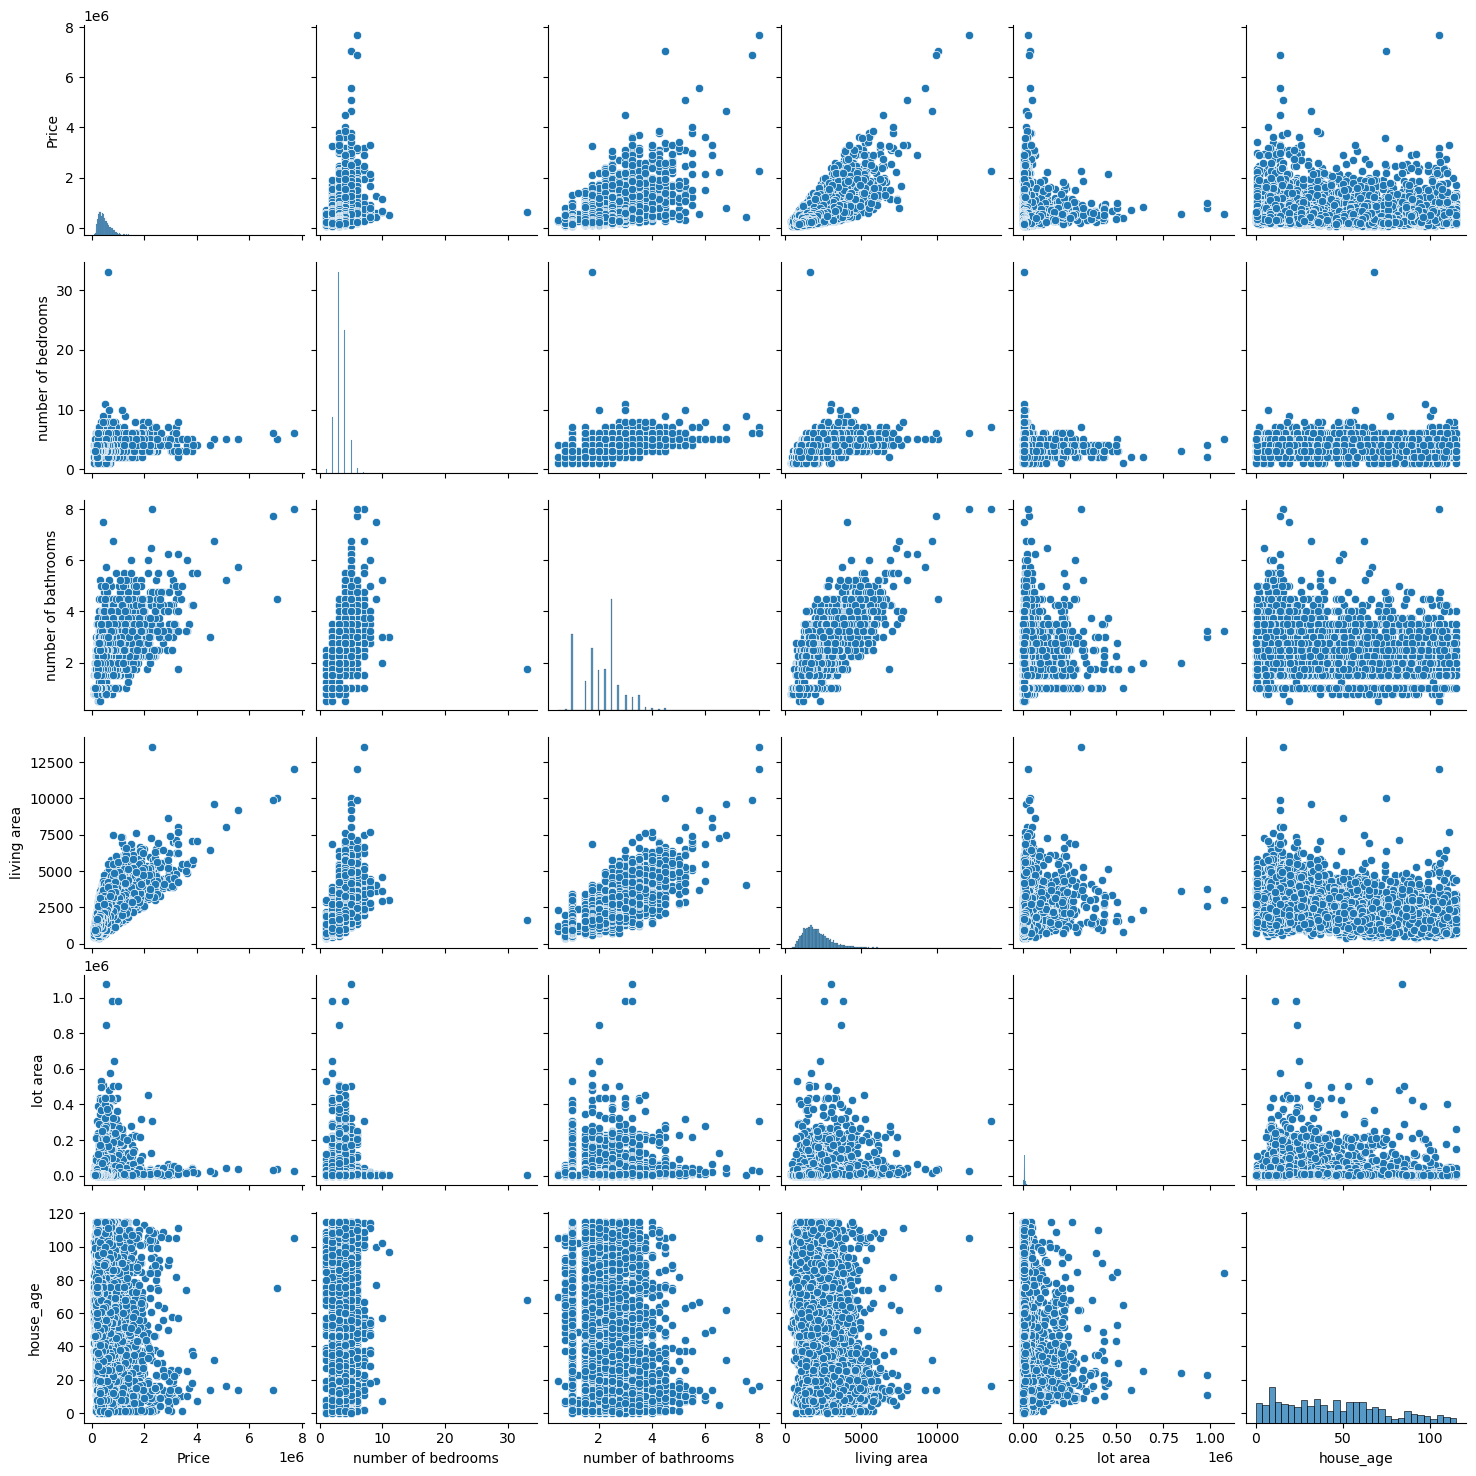

In [5]:
# Correlation heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

# Pairplot for selected features
selected_features = ["Price", "number of bedrooms", "number of bathrooms", "living area", "lot area", "house_age"]
sns.pairplot(data[selected_features])
plt.show()

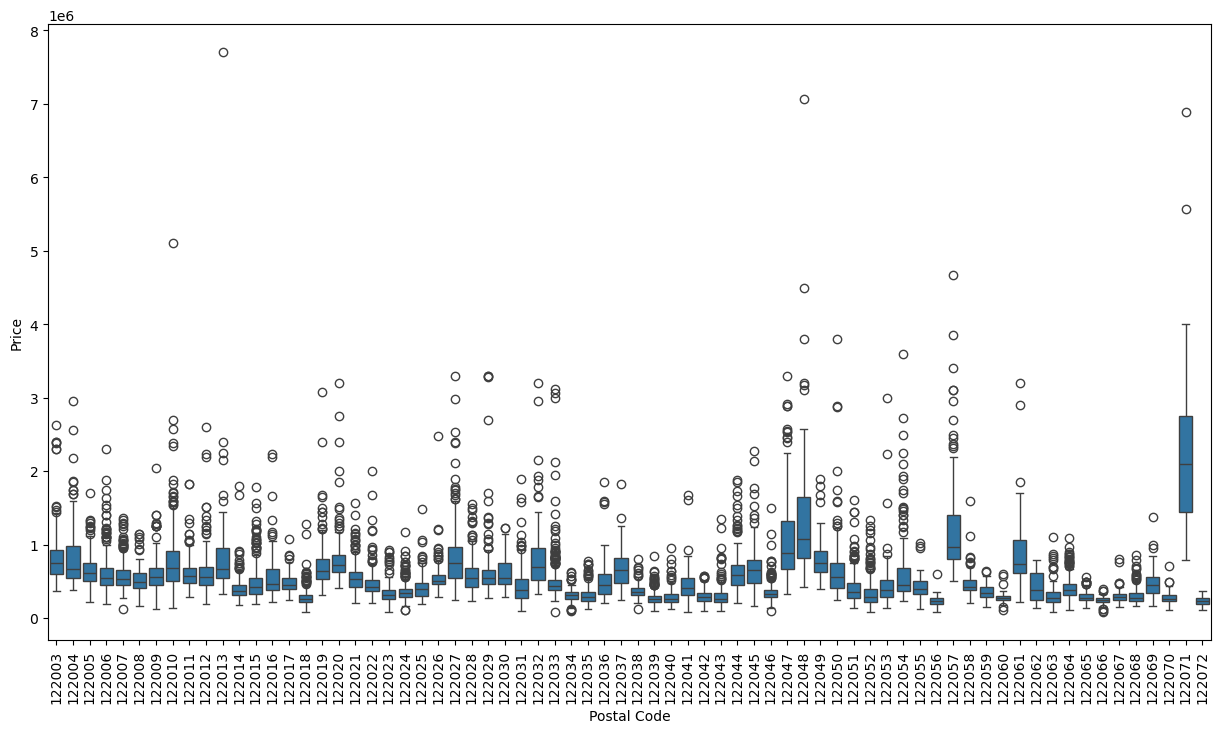

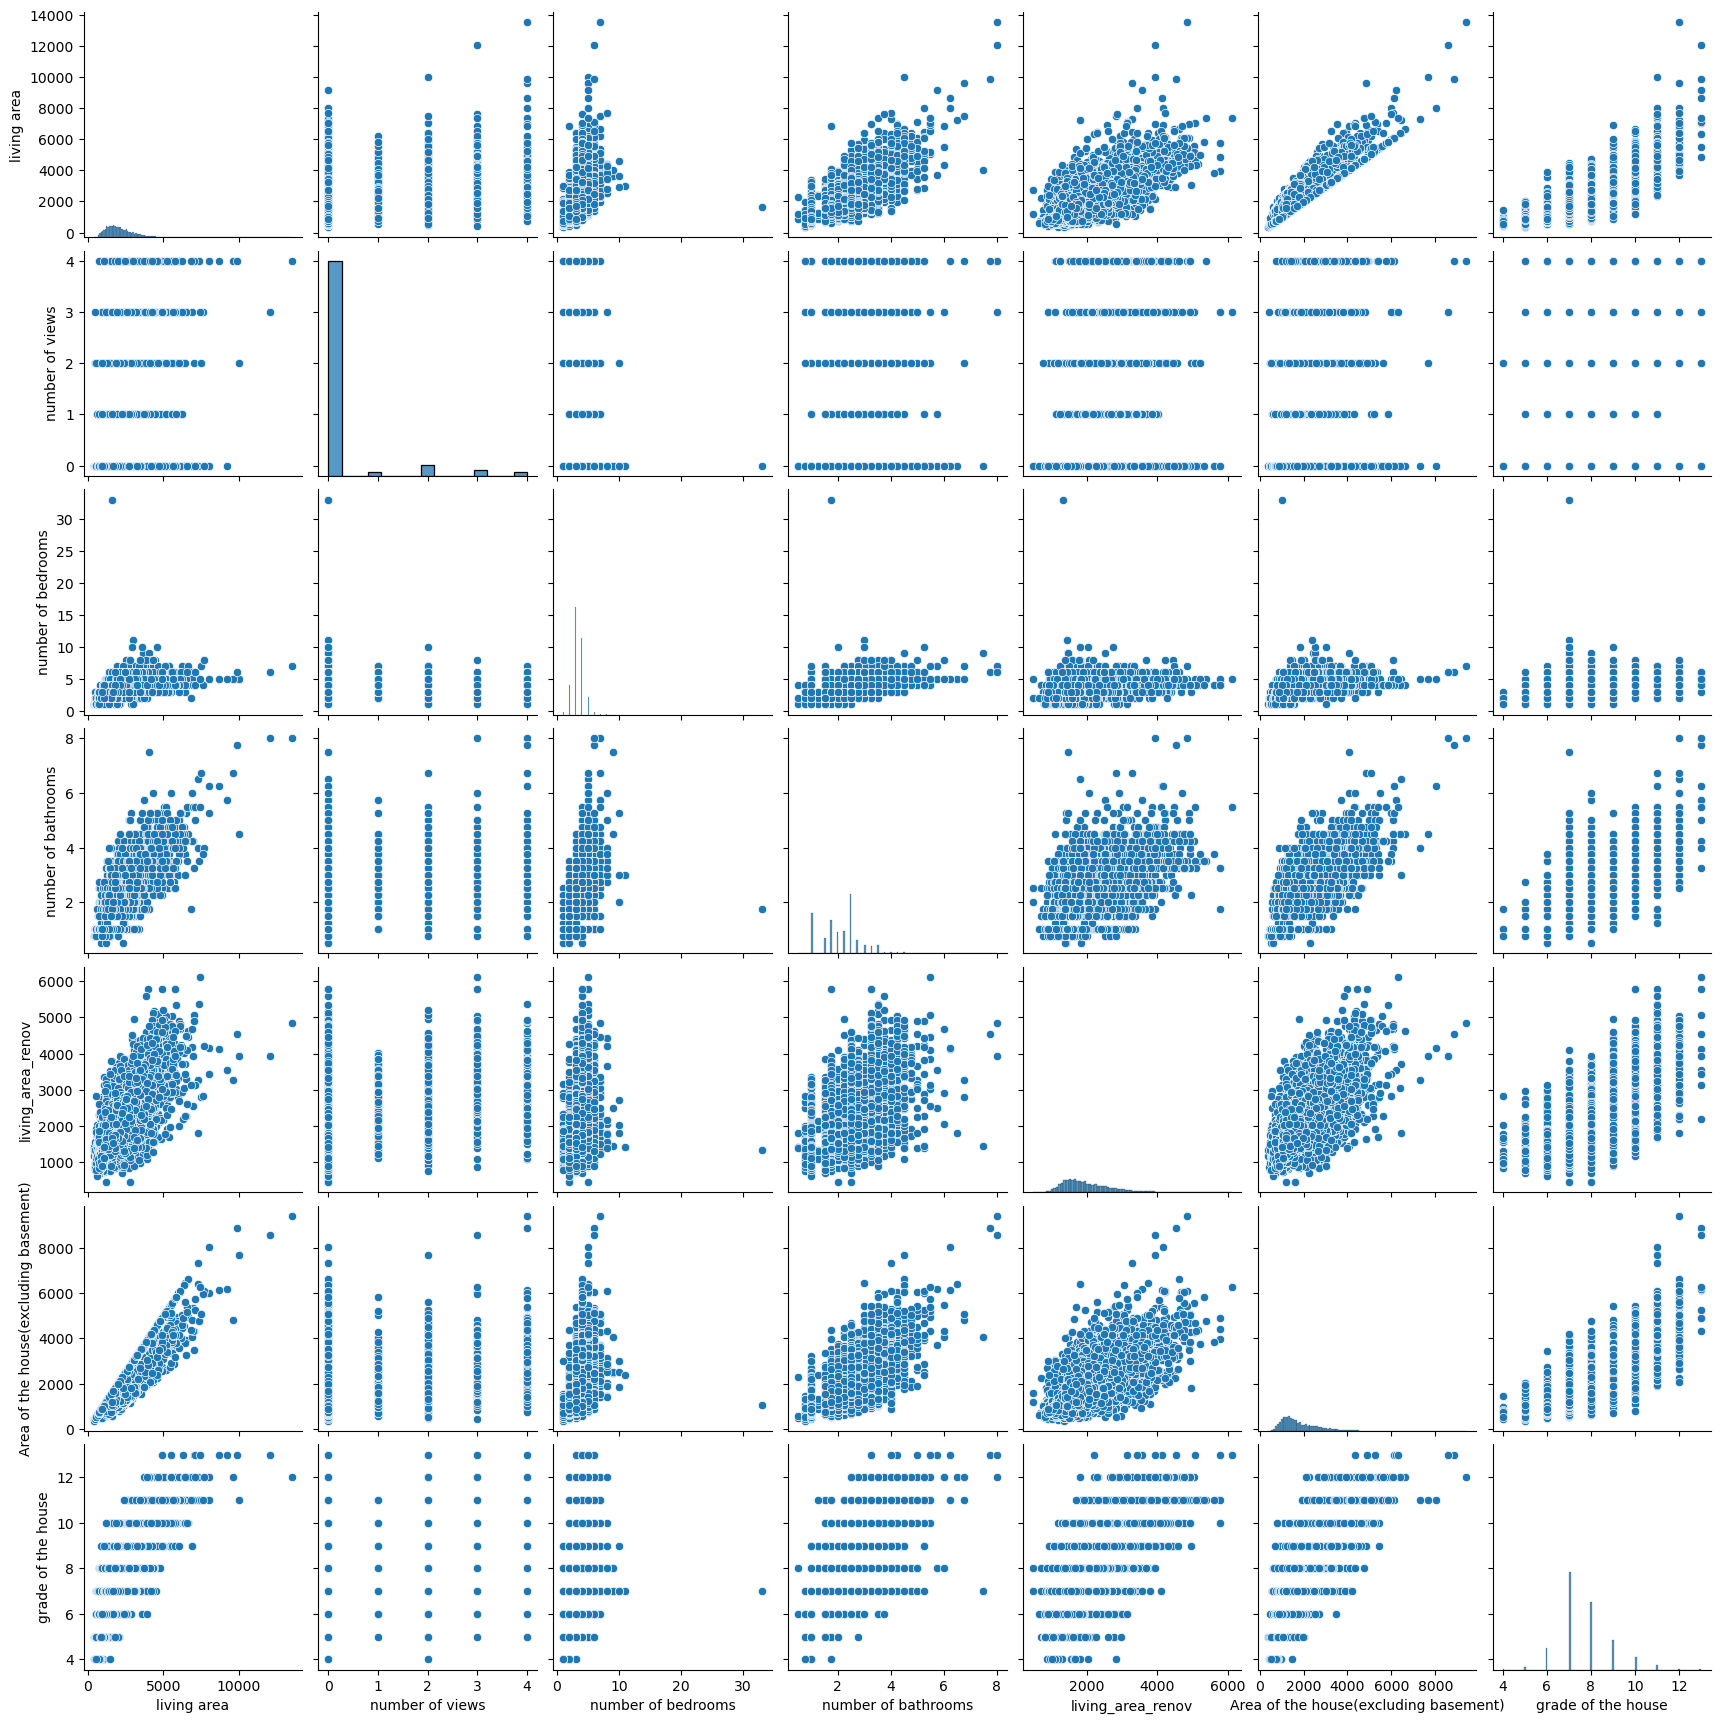

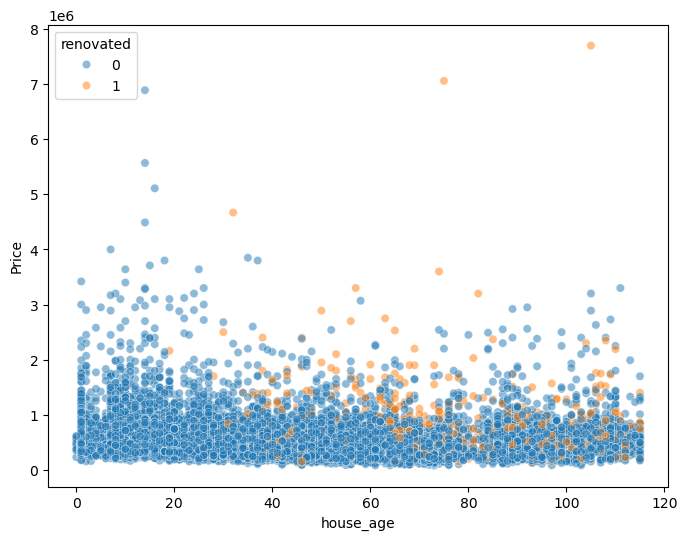

In [7]:
# 1. House prices across postal codes:

plt.figure(figsize=(15, 8))
sns.boxplot(x="Postal Code", y="Price", data=data)
plt.xticks(rotation=90)
plt.show()

#2. Relationship between house size and other features:

# Scatterplot matrix
size_features = ["living area", "number of views", "number of bedrooms", "number of bathrooms", "living_area_renov", "Area of the house(excluding basement)", "grade of the house"]
sns.pairplot(data[size_features])
plt.show()

#3. Age and renovation year's effect on house prices:

# Create a new column for renovation status
data["renovated"] = data["Renovation Year"].apply(lambda x: 1 if x > 0 else 0)

# Scatterplot for age and price
plt.figure(figsize=(8, 6))
sns.scatterplot(x="house_age", y="Price", hue="renovated", data=data, alpha=0.5)
plt.show()


## 2.CLUSTERING

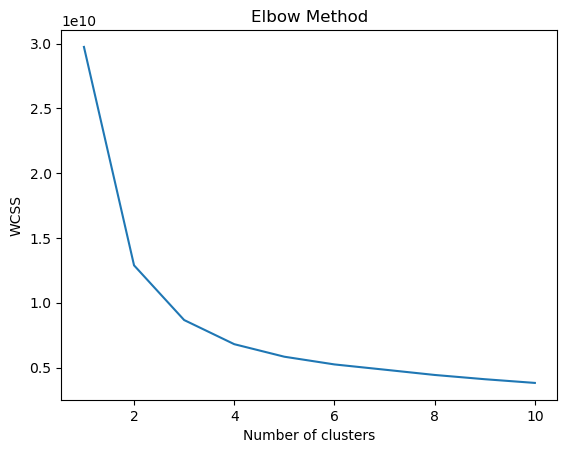

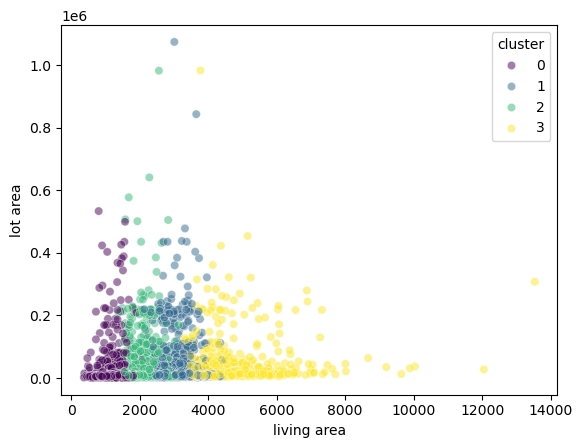

In [11]:
# 5. Clustering of similar properties:

from sklearn.cluster import KMeans

# Select features for clustering
cluster_features = ["living area", "number of views", "number of bedrooms", "number of bathrooms", "living_area_renov", "Area of the house(excluding basement)", "grade of the house"]
X_cluster = data[cluster_features]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=5, random_state=42)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Train a K-means clustering model
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=5, random_state=42)
data["cluster"] = kmeans.fit_predict(X_cluster)

# Visualize the clusters
sns.scatterplot(x="living area", y="lot area", hue="cluster", data=data, palette="viridis", legend="full", alpha=0.5)
plt.show()

## 3. Modelling and Prediction

In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Load the data
data = pd.read_csv("./House_Price_India.csv")

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop("Price", axis=1), data["Price"], test_size=0.2, random_state=42)

# Create the random forest model
model1 = RandomForestRegressor()

# Train the model
model1.fit(X_train, y_train)

# Make predictions
y_pred1 = model1.predict(X_test)

# Evaluate the model
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))
print("RMSE for Random Forest:", rmse1)

# Create the support vector machine model
model2 = SVR()

# Train the model
model2.fit(X_train, y_train)

# Make predictions
y_pred2 = model2.predict(X_test)

# Evaluate the model
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
print("RMSE for Support Vector Machine:", rmse2)

# Create the XGBoost model
model3 = XGBRegressor(learning_rate= 0.05, max_depth= 7, n_estimators= 300)

# Train the model
model3.fit(X_train, y_train)

# Make predictions
y_pred3 = model3.predict(X_test)

# Evaluate the model
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred3))
print("RMSE for XGBoost:", rmse3)

# Compare the performance of the three models
if rmse1 < rmse2 and rmse1 < rmse3:
    print("Random Forest performed better")
elif rmse2 < rmse1 and rmse2 < rmse3:
    print("Support Vector Machine performed better")
else:
    print("XGBoost performed better")


# Tune hyperparameters for XGBoost
parameters = {
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7]
}

# Create a grid search object
grid_search = GridSearchCV(XGBRegressor(), parameters, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Make predictions on the test data using the best parameters
y_pred = grid_search.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE for Random Forest: 76615.04699534102
RMSE for Support Vector Machine: 386867.06243495457
RMSE for XGBoost: 100159.82865919272
Random Forest performed better
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
RMSE: 90219.33114749107


RMSE Linear Regression: 199075.7022332724
